<a href="https://colab.research.google.com/github/RizqiRHuda/PVCK_Semester5/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MODUL 7 – Filter Spasial Low Pass Filter, High Pass Filter, Point Detection, Line Detection, Edge Detection**

Nama     : Rizqi Rohmatul Huda

Kelas    : TI-3C

No.Absen : 21

NIM      : 2141720264

### **D. Praktikum Filter**
1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.
2. Berikut merupakan langkah-langkah yang dapat dilakukan:

a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.


b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.

### **Konvulasi tanpa Library**

**Membuat fungsi konvulas**
Fungsi konvulasi yang dibuat memiliki parameter berupa:
1. citra masukan,
2. kernel berupa matriks untuk memfilter citra,
3. nilai stride/besarnya pergeseran untuk setiap konvulasi,
4. nilai pad yang akan ditambahkan pada citra



```
def convulation2d(image, kernel, stride,, padding):
```



In [ ]:
def convolution2d(image, kernel, stride, padding):
  pass

d. Load citra yang akan diproses dan diubah menjadi citra keabuan

In [3]:
img = cv.imread('/content/drive/MyDrive/img_python/Images/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

e. Tentukan kernel yang akan digunakan, contohnya kernel untuk filter sharpening
sebagai berikut:

**Menentukan kernel yang akan digunakan**

In [4]:
#image sharpen
kernel_sharpen = np.array([[0,-1,0],
                          [-1,5,-1],
                          [0,-1,0]])

f. Memanggil fungsi konvolusi yang telah dibuat sebelumnya, dan menampilkan hasil
konvolusinya:

**Memanggil fungsi konvulasi dan menerapkan setiap filter yang telah ditentukan**

In [ ]:
convolution2d(img_gray, kernel_sharpen,1,2)

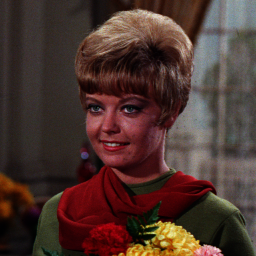

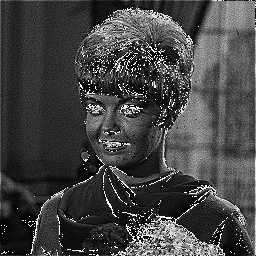

In [14]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

def convolution2d(image, kernel, stride, padding):
    # Ubah citra ke grayscale jika belum
    if len(image.shape) == 3:
        image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    else:
        image_gray = image

    # Lakukan konvolusi
    output_height = (image_gray.shape[0] + 2 * padding - kernel.shape[0]) // stride + 1
    output_width = (image_gray.shape[1] + 2 * padding - kernel.shape[1]) // stride + 1
    output = np.zeros((output_height, output_width), dtype=np.float32)

    # Padding citra
    image_padded = np.pad(image_gray, ((padding, padding), (padding, padding)), mode='constant')

    # Lakukan konvolusi
    for y in range(0, output_height):
        for x in range(0, output_width):
            # Ambil area dari citra sesuai dengan ukuran kernel
            img_region = image_padded[y * stride:y * stride + kernel.shape[0], x * stride:x * stride + kernel.shape[1]]
            # Kalikan elemen-wise dengan kernel dan jumlahkan
            output[y, x] = np.sum(img_region * kernel)

    return output

# Load citra
img = cv.imread('/content/drive/MyDrive/img_python/Images/female.tiff')

# Kernel untuk sharpening
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

# Lakukan konvolusi dengan kernel sharpening
output_sharpen = convolution2d(img, kernel_sharpen, stride=1, padding=1)

# Tampilkan hasil konvolusi
cv2_imshow(img)
cv2_imshow(output_sharpen.astype(np.uint8))



**Code fungsi konvulasi**:

3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter
berikut: